# 다중로지스틱회귀 (Wine 데이터셋)

와인의 화학적 성분을 통한 등급 분류 데이터 셋

> https://www.kaggle.com/competitions/wine-m

캐글에서 진행된 챌린지에서 평가 등급은 `f1 score`였으므로 이 예제도 `f1 score`를 기준으로 분석을 진행함.

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from statsmodels.api import MNLogit, add_constant

### [2] 데이터 가져오기

| 변수명 | 설명 |
| --- | --- |
| alcohol | 알코올 |
| malic_acid | 말산 |
| ash | 애쉬 |
| alcalinity_of_ash | 애쉬의 알칼리도 |
| magnesium | 마그네슘 |
| total_phenols | 총 페놀 |
| flavanoids | 플라바노이드 |
| nonflavanoid_phenols | 비플라바노이드 페놀 |
| proanthocyanins | 프로안토시아닌 |
| color_intensity | 색상강도 |
| hue | 색조 |
| od280/od315_of_diluted_wines | 희석된 와인의 OD280/OD315 |
| proline | 프롤린 |
| class | 분류 (`0`,`1`,`2`) |

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/wine.xlsx", categories=['class'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

## #02. 탐색적 데이터 분석

### [1] 상자그림

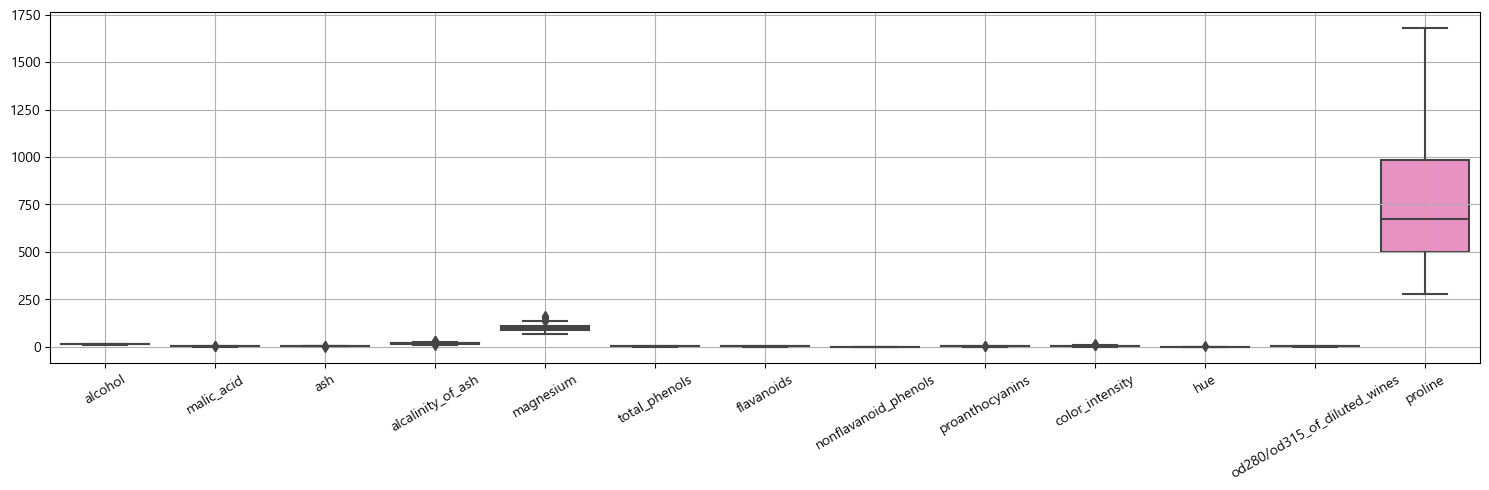

In [3]:
my_boxplot(origin, figsize=(15, 5), callback=lambda ax: ax.set_xticklabels(ax.get_xticklabels(), rotation=30))

> 일부 이상치가 관찰되고 있으며 특정 변수(`proline`)의 분포가 다른 데이터와 큰 차이가 있음이 확인된다.

### [2] 종속변수에 따른 각 독립변수의 분포 확인

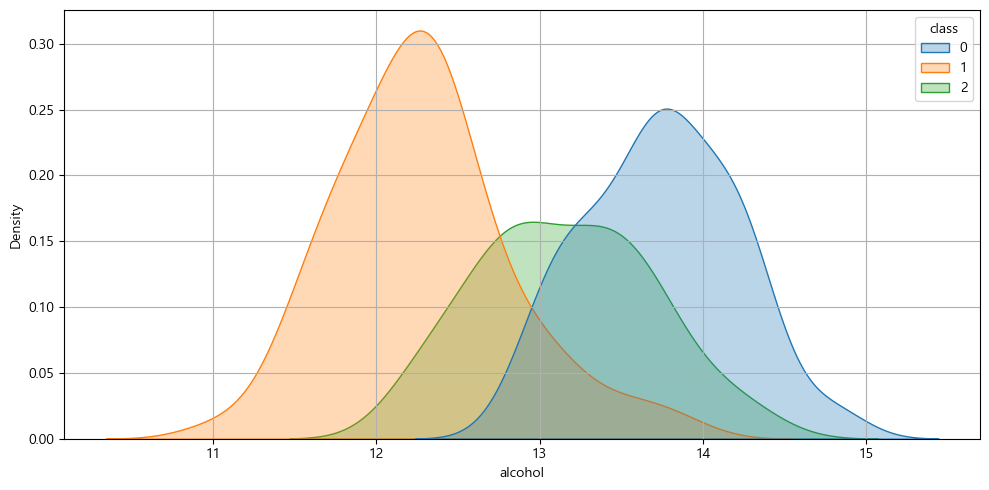

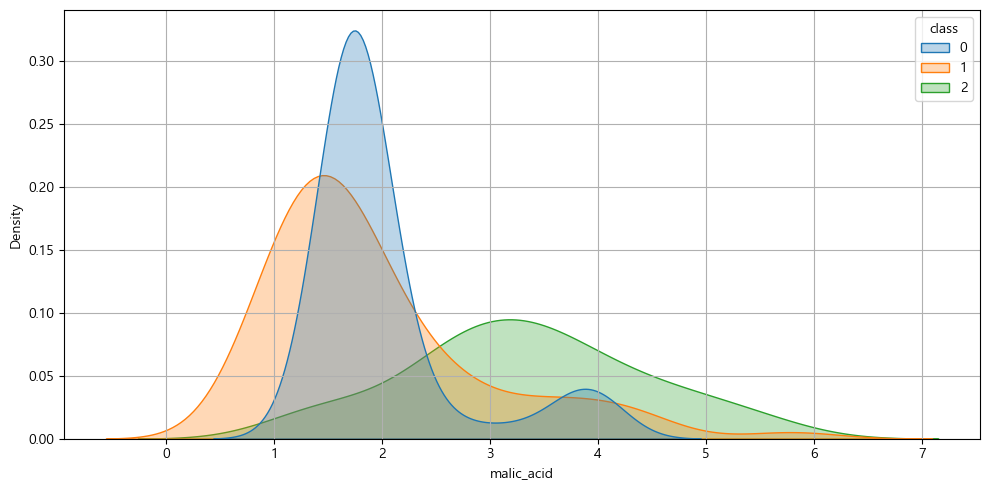

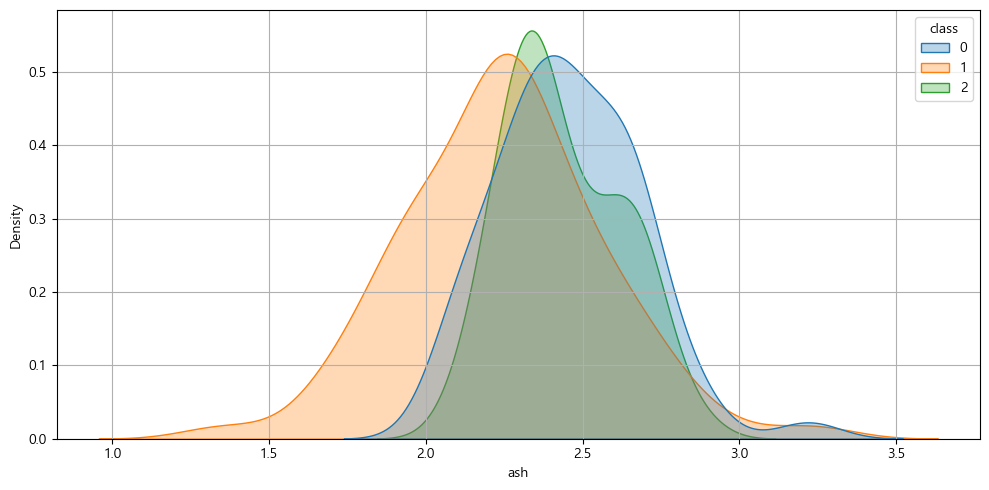

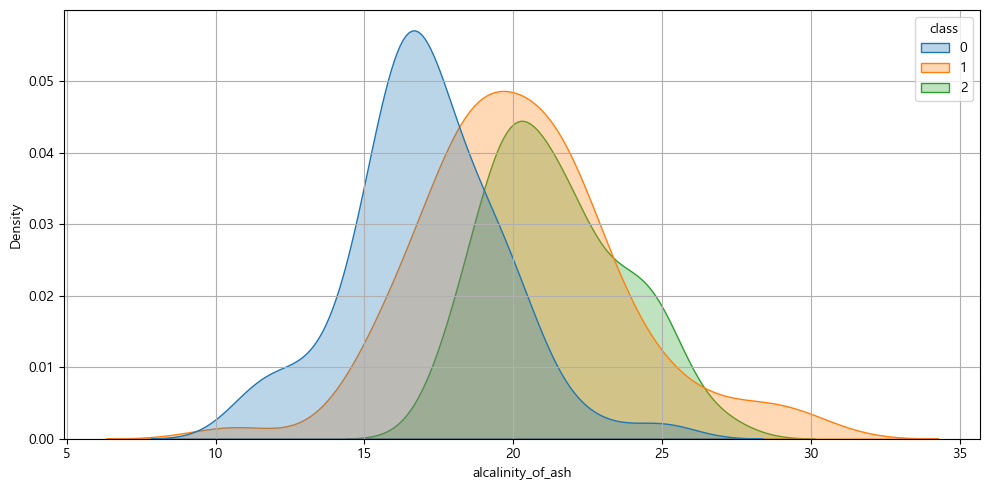

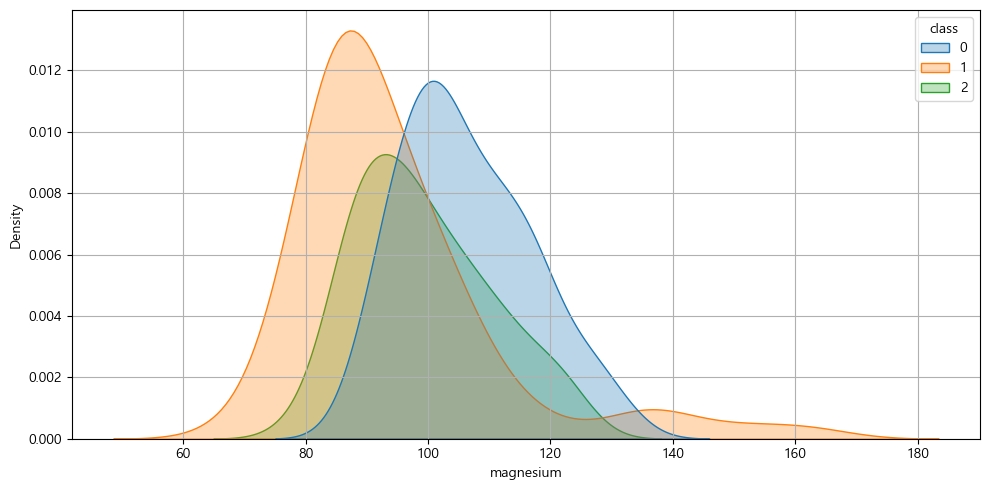

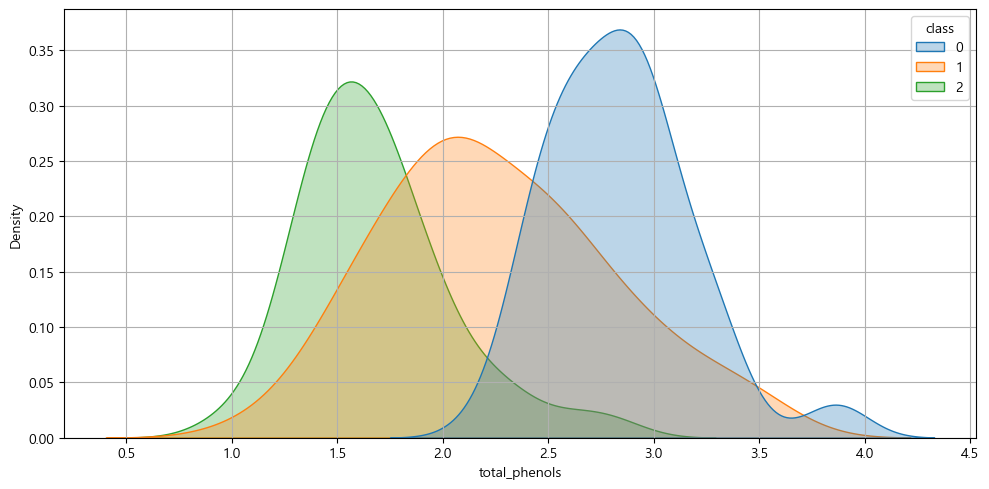

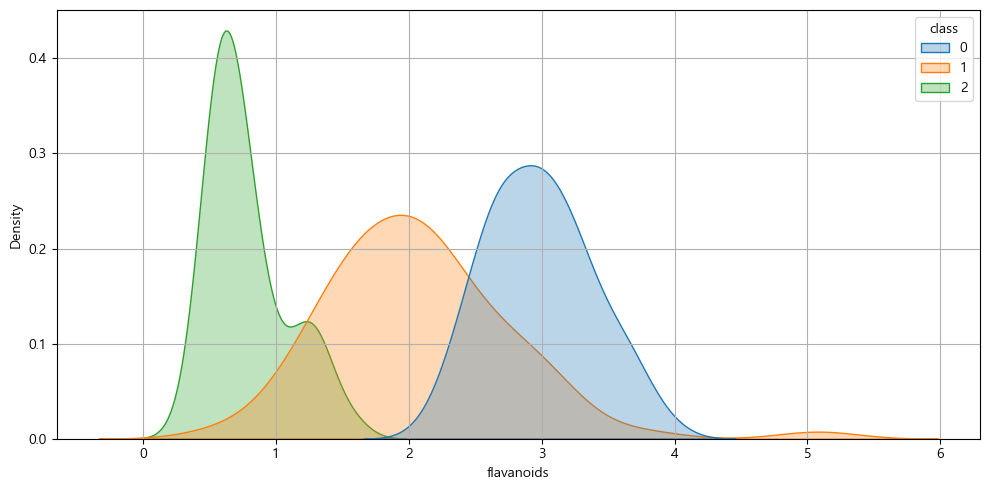

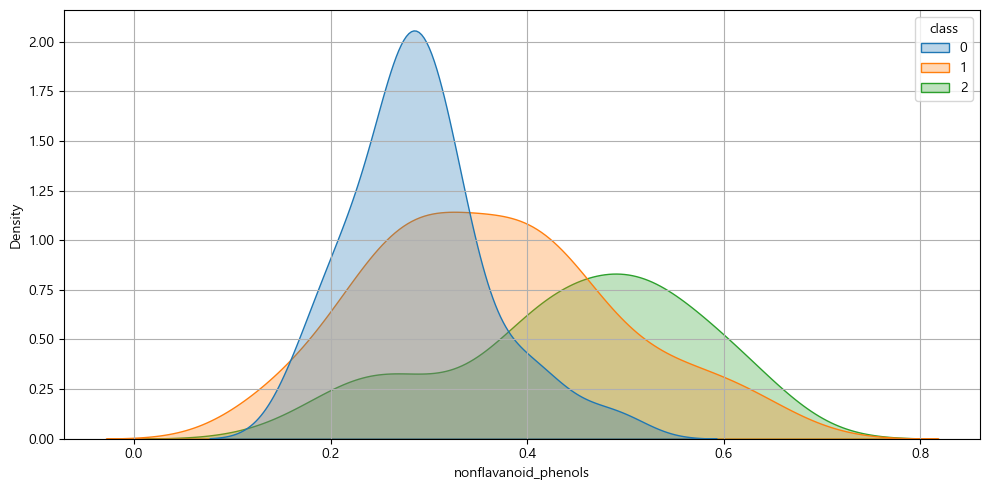

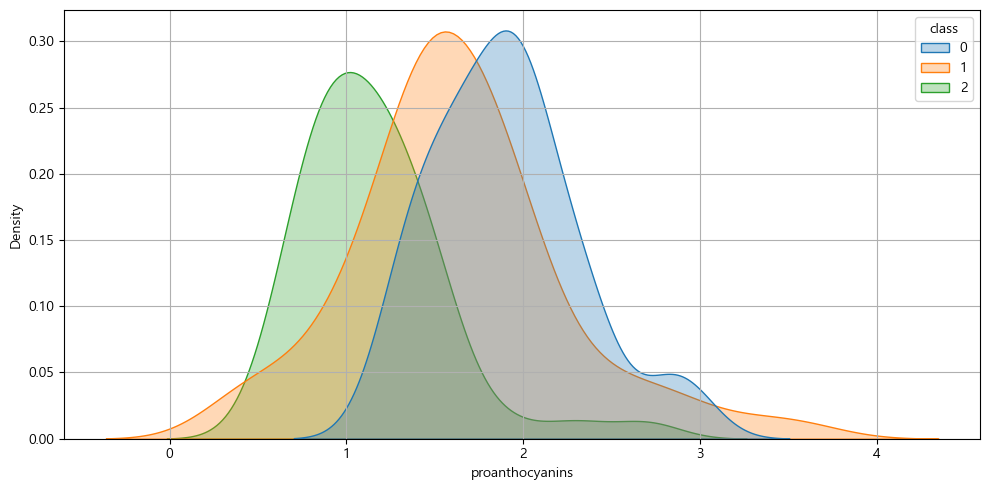

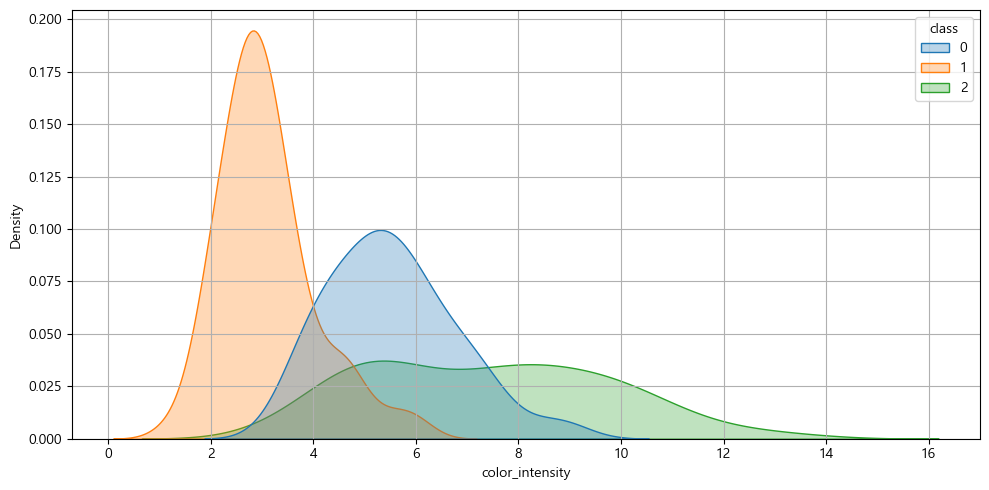

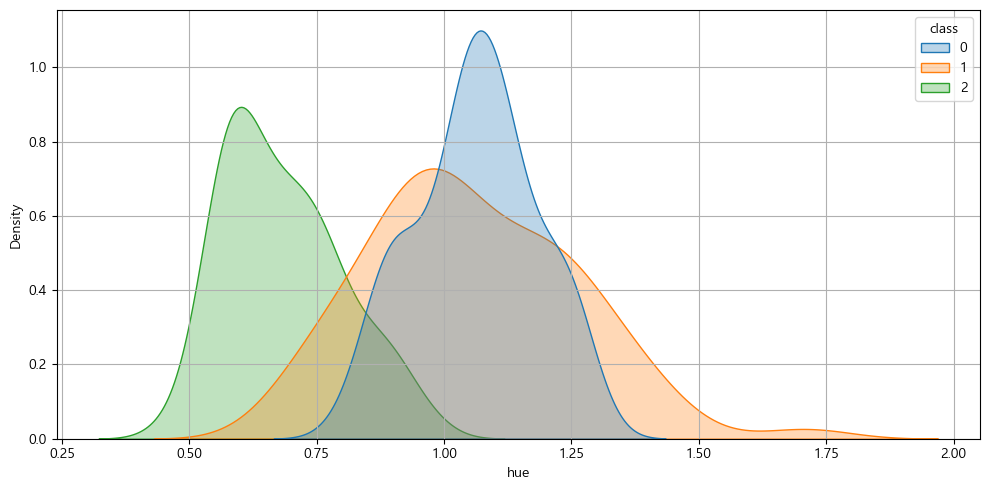

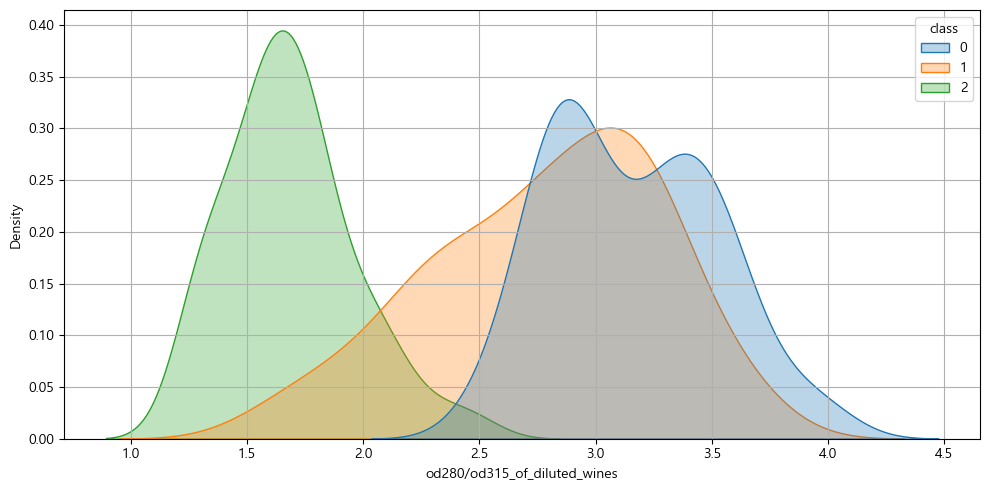

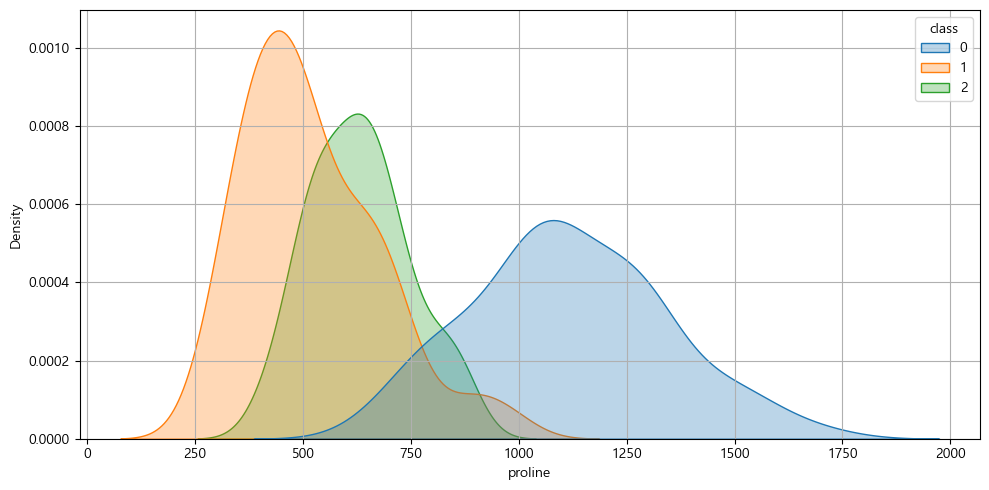

In [4]:
my_distribution_by_class(origin, hue='class', fill=True)

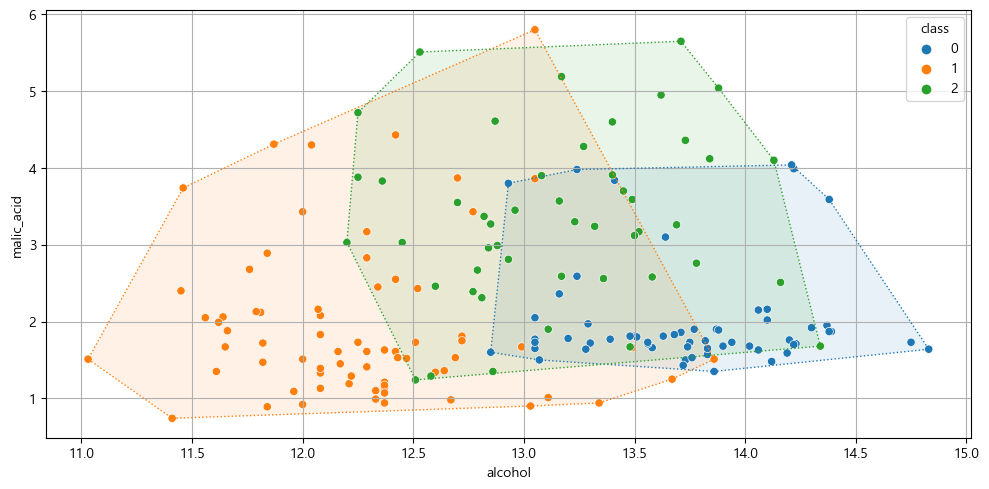

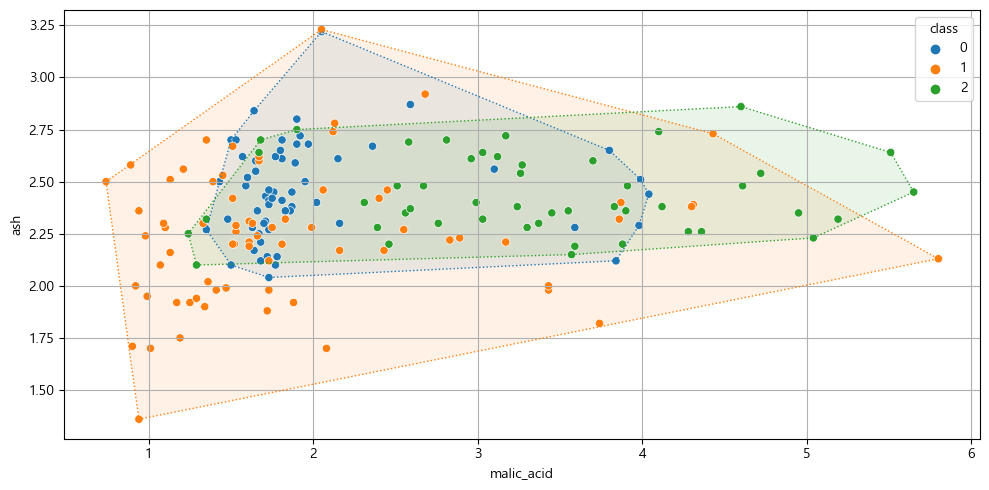

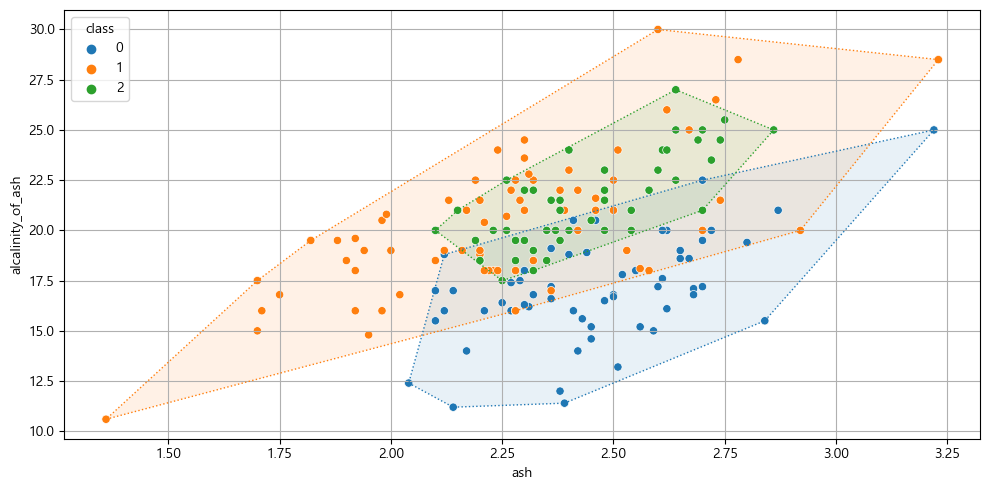

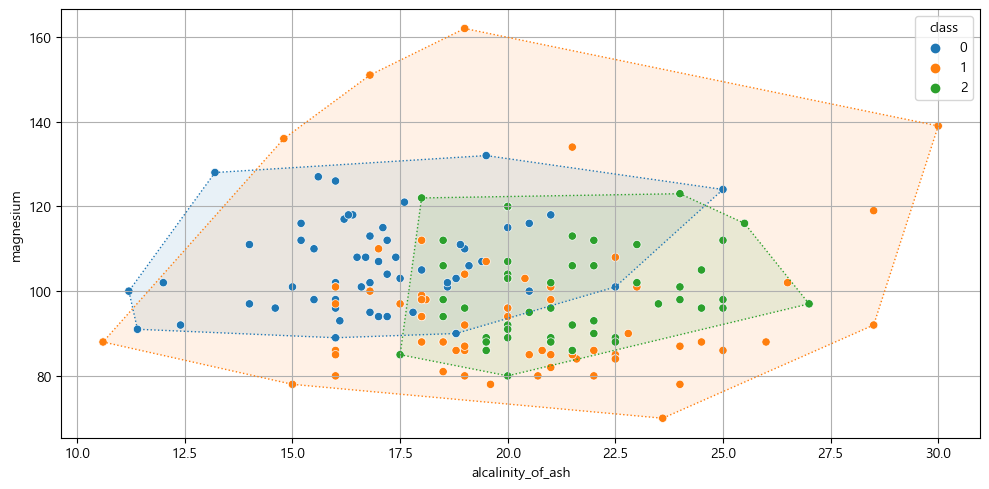

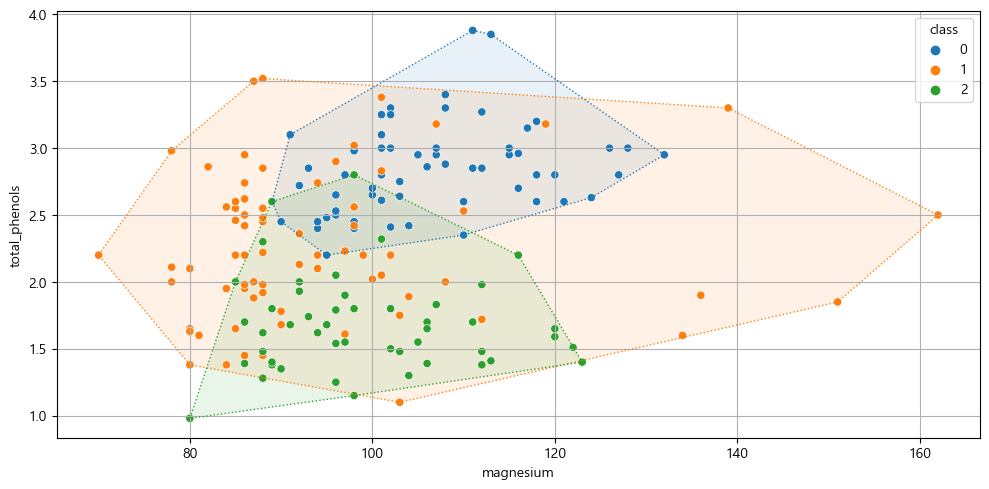

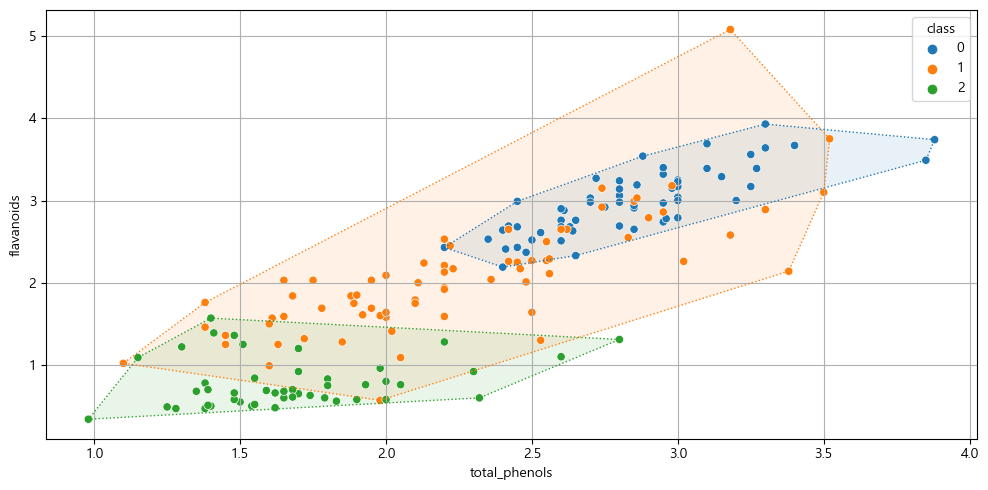

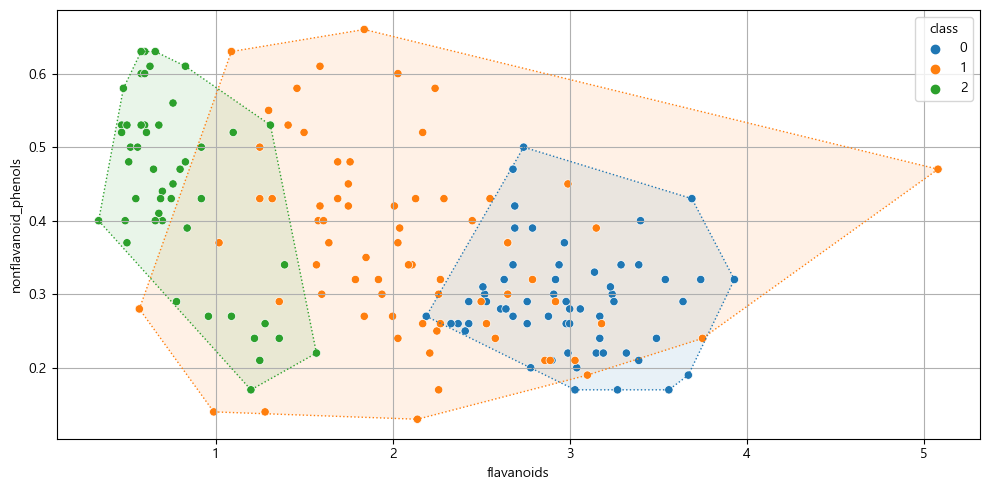

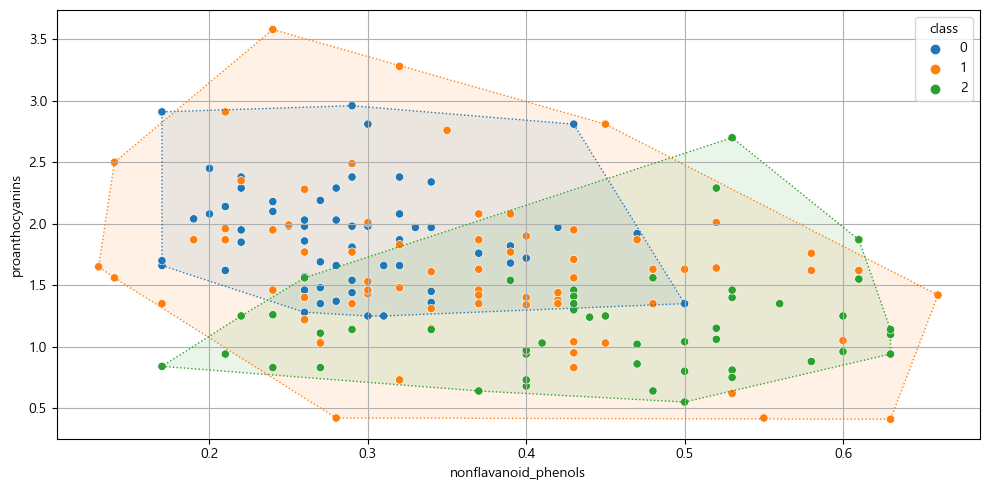

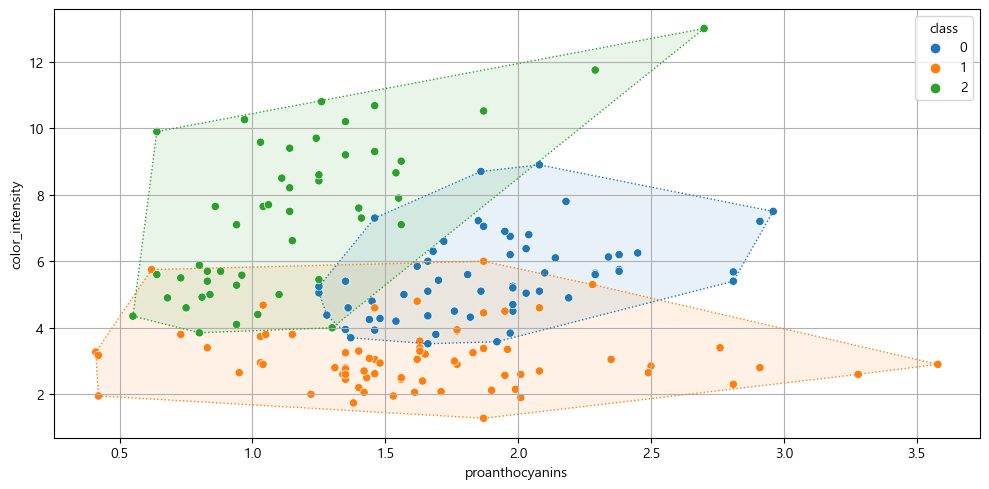

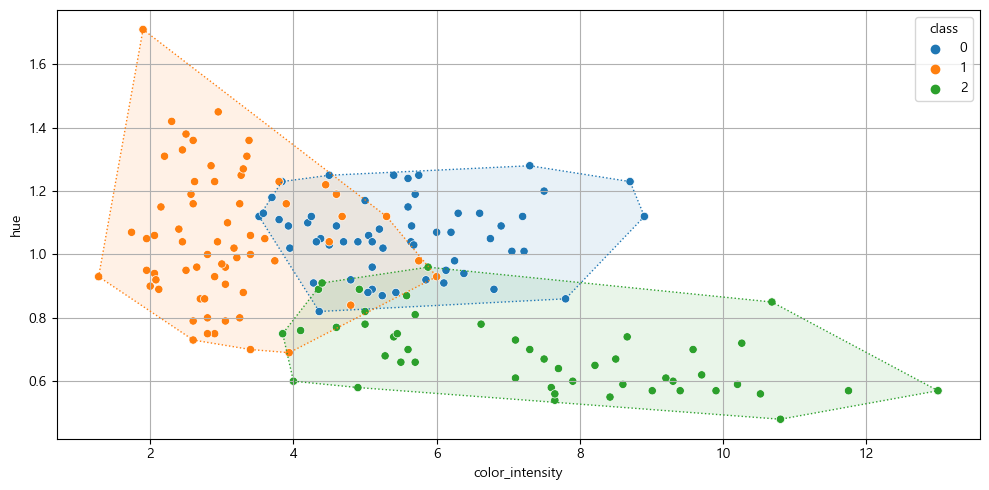

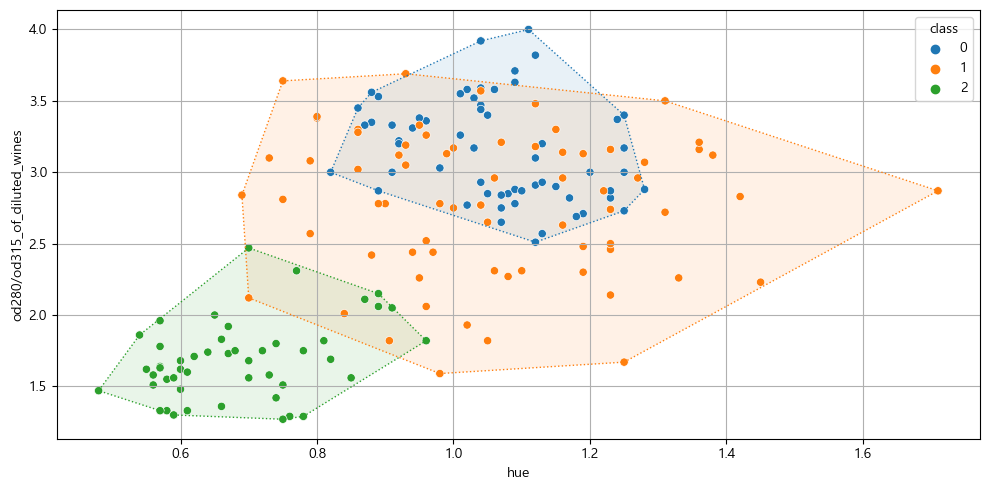

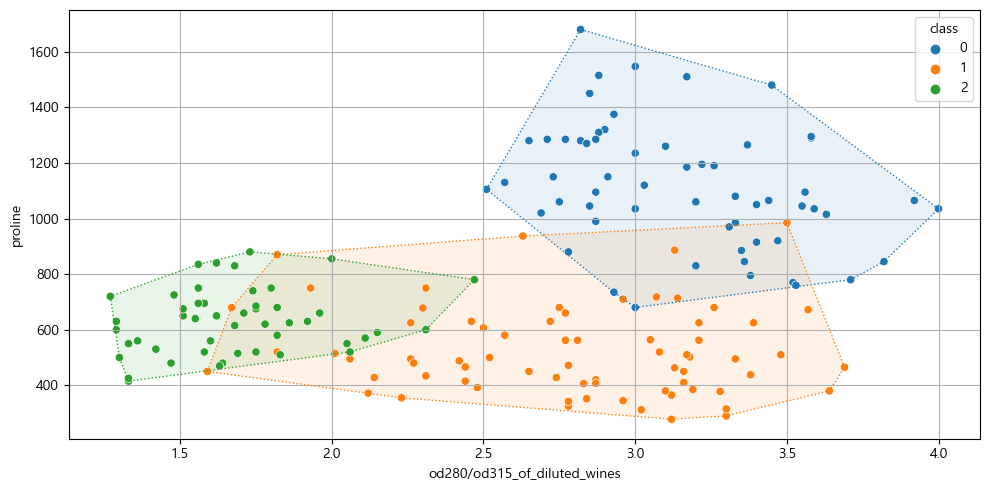

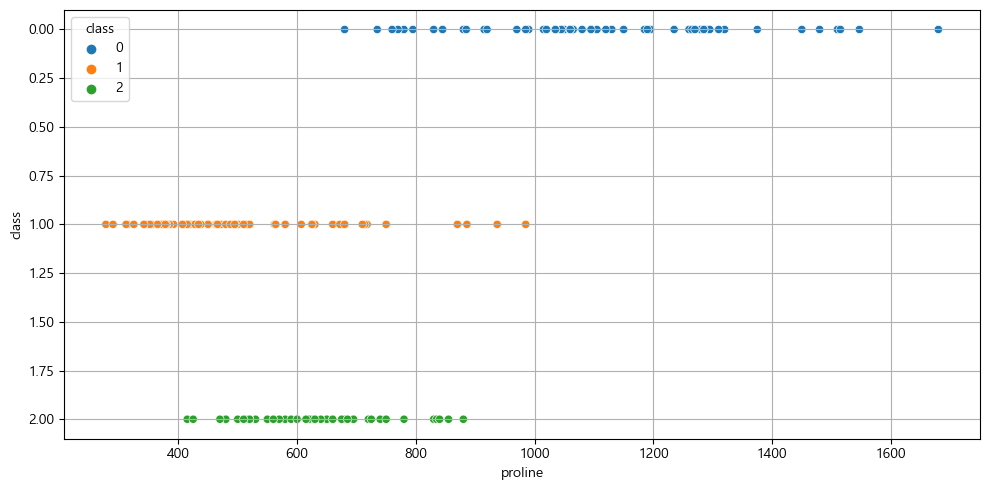

In [5]:
my_scatter_by_class(origin, hue='class', outline=True)

## #03. 데이터 전처리

### [1] 데이터 스케일링

In [6]:
df = my_standard_scaler(origin, 'class')
my_pretty_table(df.head())

+----+-----------+--------------+-----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-----------+--------------------------------+-----------+---------+
|    |   alcohol |   malic_acid |       ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   nonflavanoid_phenols |   proanthocyanins |   color_intensity |       hue |   od280/od315_of_diluted_wines |   proline |   class |
|----+-----------+--------------+-----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-----------+--------------------------------+-----------+---------|
|  0 |   1.51861 |     -0.56225 |  0.232053 |            -1.16959 |     1.91391 |        0.808997 |      1.03482 |              -0.659563 |           1.22488 |          0.251717 |  0.362177 |                        1.84792 |   1.01301 |       0 |
|  1 |   0.2

### [2] 종속변수에 대한 데이터 타입 변환

In [7]:
df['class'] = df['class'].astype('int')

### [3] 훈련, 검증 데이터 분할

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## #04. 분석모형 구현

### [1] 전체 변수에 대한 기본 모델

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.992857 |
|  7 |   0.1 | l2        |          0.985714 |
|  4 |  0.01 | l2        |          0.979064 |
| 13 |    10 | l2        |          0.978571 |
| 16 |   100 | l2        |          0.971429 |
|  1 | 0.001 | l2        |          0.704433 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.972222 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

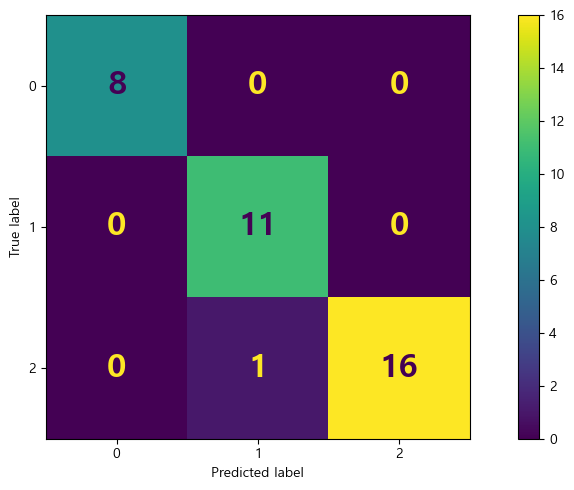


[Roc Curve]

[학습곡선]


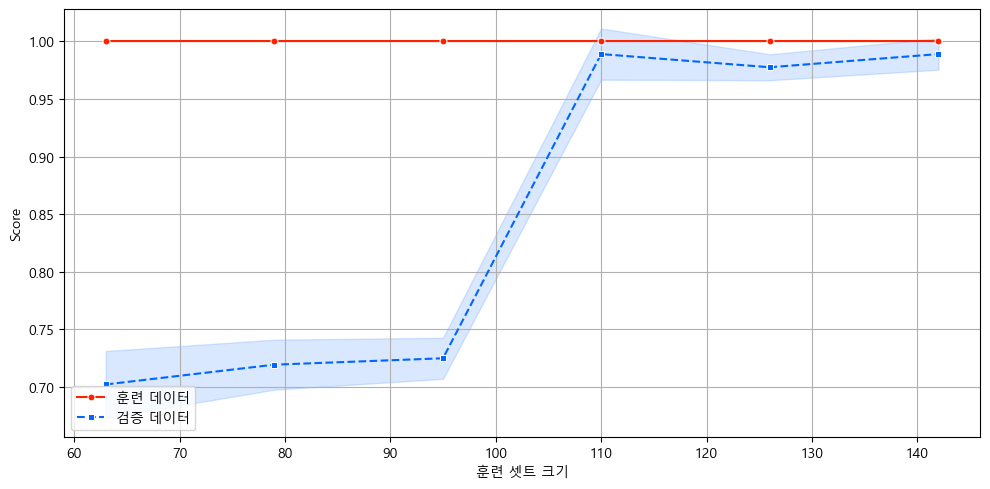

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [9]:
my_logistic_classification(x_train, y_train, x_test, y_test, hist=False, roc=False, pr=False, report=False)

> F1 Score가 `0.975`로 나왔다. 하지만 Kaggle에 등록된 제출물 중에 최신 제출물의 스코어가 `0.98`이므로 다른 방법을 다시 시도해 보자

### [2] 데이터 불균형 해소 

#### (1) RandomOverSampler

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.983333 |
| 13 |    10 | l2        |          0.983333 |
| 16 |   100 | l2        |          0.983333 |
|  4 |  0.01 | l2        |          0.977778 |
| 10 |     1 | l2        |          0.977778 |
|  1 | 0.001 | l2        |          0.955556 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.994444 |     0.972222 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.994536 |     0.962963 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

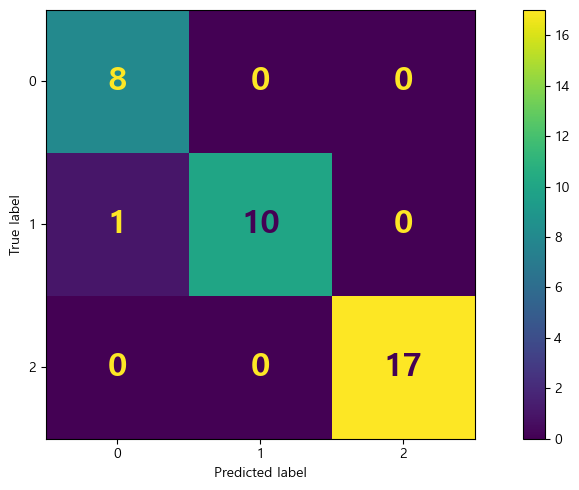


[Roc Curve]

[학습곡선]


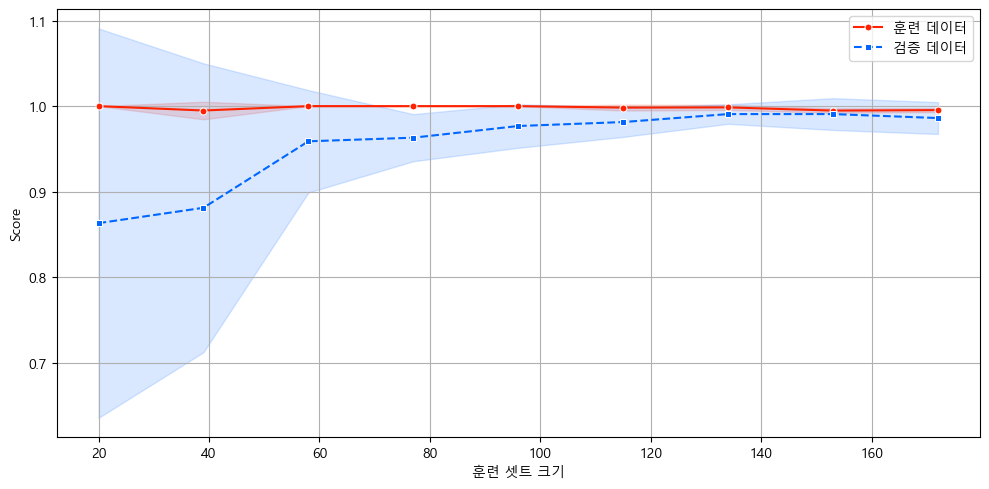

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [10]:
ros_x, ros_y = my_balance(x_train, y_train, method="over")
my_logistic_classification(ros_x, ros_y, x_test, y_test, roc=False, pr=False, hist=False, report=False)

> RandomUnderSampler를 사용한 경우 데이터가 줄어들기 때문에 Kaggle의 기준 점수인 0.98보다 더 낮은 0.96이 나왔다.
>
> 훈련 셋트가 적은 경우 과대적합이 보인다.

#### (3) SMOTE

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.988889 |
| 13 |    10 | l2        |          0.988889 |
|  4 |  0.01 | l2        |          0.983333 |
| 10 |     1 | l2        |          0.983333 |
| 16 |   100 | l2        |          0.983333 |
|  1 | 0.001 | l2        |          0.966667 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.994444 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.994536 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

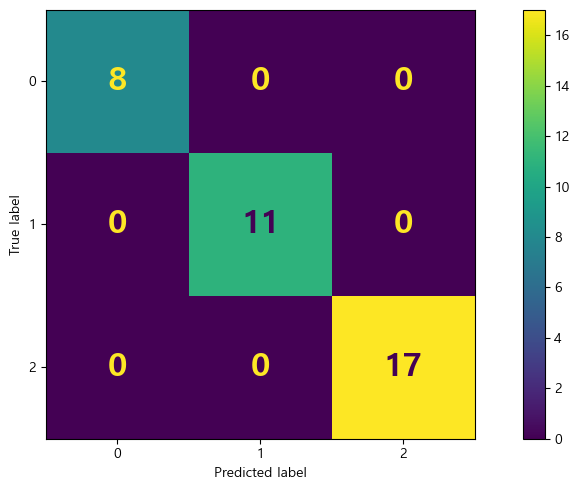


[Roc Curve]

[학습곡선]


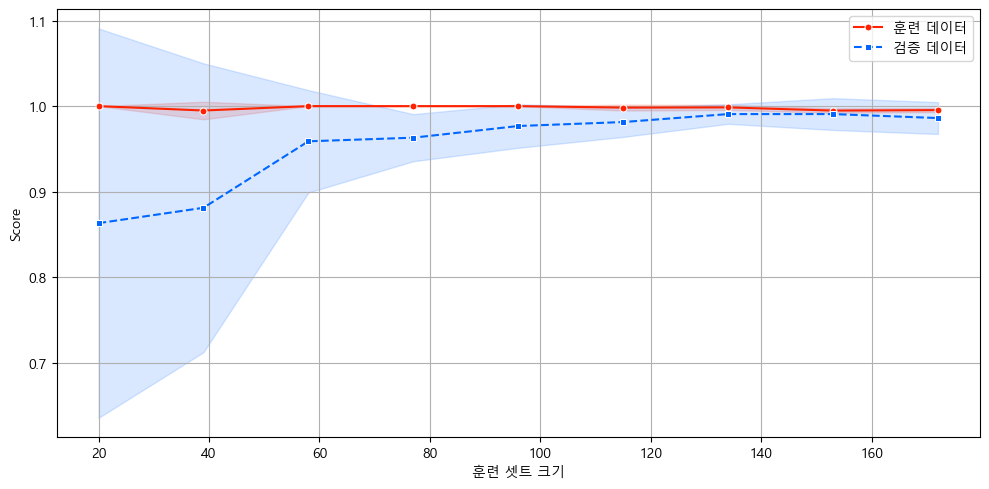

In [11]:
smote_x, smote_y = my_balance(x_train, y_train, method='smote')
estimator = my_logistic_classification(smote_x, smote_y, x_test, y_test, roc=False, pr=False, hist=False, report=False)

> f1 score가 `0.99`가 나왔으며 학습곡선의 모양도 가장 좋아 보인다.

## #05. 독립변수 보고

### [1] 다중 로지스틱의 회귀계수

다중 로지스틱의 회귀계수는 `class`의 수 만큼 생성된다.

#### (1) 클래스 목록 확인

In [12]:
estimator.classes_

array([0, 1, 2])

#### (2) 회귀계수 확인

종속변수의 클래스 수에 따른 경우의 수가 존재한다.

In [13]:
estimator.coef_

array([[ 0.44061451,  0.03131498,  0.24141888, -0.43813929,  0.12027121,
         0.22878097,  0.3448559 , -0.12657022,  0.10888673,  0.03277121,
         0.13552846,  0.36960539,  0.55822709],
       [-0.57668817, -0.29251505, -0.3528408 ,  0.2883703 , -0.19191193,
         0.04493988,  0.08613722,  0.08092595,  0.10704508, -0.49692912,
         0.30866049,  0.08297066, -0.52136113],
       [ 0.13607366,  0.26120007,  0.11142191,  0.14976899,  0.07164071,
        -0.27372086, -0.43099312,  0.04564427, -0.21593181,  0.46415791,
        -0.44418895, -0.45257605, -0.03686596]])

In [14]:
estimator.intercept_

array([ 0.094452  ,  0.51004211, -0.60449411])